# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [101]:
import pandas as pd

df = pd.read_csv('Summary of Weather.csv') 

# Check all the variables using .columns to get column names and .head() to look at the first few rows
print(df.columns)
df.head() # Look at the first few rows of the dataframe



Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')


/var/folders/sq/ygyv03zj7zgg8y5fkrr9s8tc0000gn/T/ipykernel_69536/19559103.py:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Summary of Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Clean the dataset, drop variables

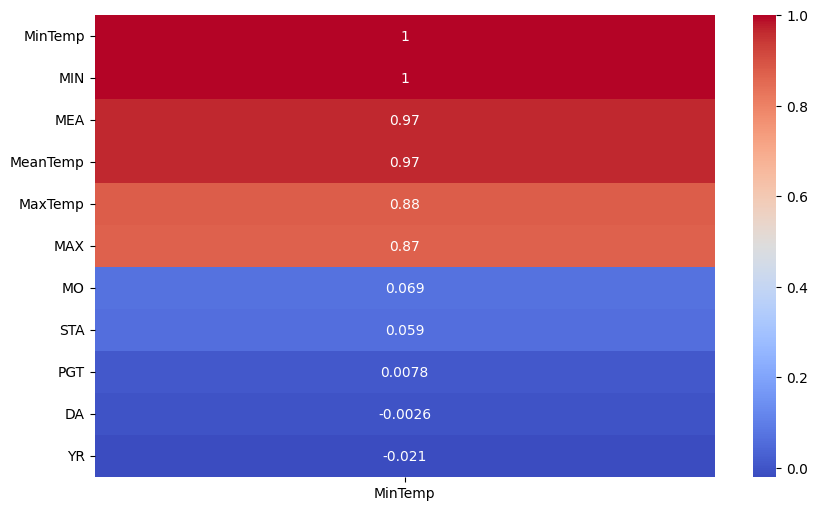

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

df.isnull().sum() # check how many missing values there are in each column

columns_to_drop = [
    'WindGustSpd', 'DR', 'SPD', 'SND', 'FT', 'FB', 'FTI', 'ITH',
    'SD3', 'RHX', 'RHN', 'RVG', 'WTE'
] # drop the columns with majority of missing values

columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop)

# Select only numeric columns for correlation 
numeric_df = df.select_dtypes(include=['number'])

# Get the correlation of 'MinTemp' with all other numeric columns
min_temp_corr = numeric_df.corr()['MinTemp'].sort_values(ascending=False)

# Display it as a barplot or heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(min_temp_corr.to_frame(), annot=True, cmap='coolwarm', cbar=True)

# Drop irrelevant and highly dependent variables
columns_to_drop = ['MIN', 'MEA', 'MeanTemp', 'MO', 'STA', 'PGT', 'DA', 'YR']
df_cleaned = numeric_df.drop(columns=columns_to_drop)



## 3. Select the feature(s) for the model, and explain the reason

In [103]:
# I selected the features 'MaxTemp' and 'MAX' as it had strong correlations with MinTemp (which is our target variable) without it being very highly dependent on MinTemp itself such as 'MIN' and 'MEA'.
# Very highly correlated variables (like MeanTemp) were dropped to avoid multicollinearity issues.

## 4. Split the dataset (80% for training, 20% for testing)

In [104]:
from sklearn.model_selection import train_test_split

X = df_cleaned[['MaxTemp', 'MAX']]
y = numeric_df['MinTemp']

# Combine into one DataFrame to handle missing values
data = pd.concat([X, y], axis=1)

# Drop rows with any missing values
data = data.dropna()

# Redefine X and y from the cleaned data
X = data[['MaxTemp', 'MAX']]
y = data['MinTemp']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)


## 5. Choose the algorithm, train and test the model

In [105]:
# We can use a simple linear regression model to predict MinTemp based on MaxTemp and MAX on X_test

from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 6. Evaluate and Visualize model Performance

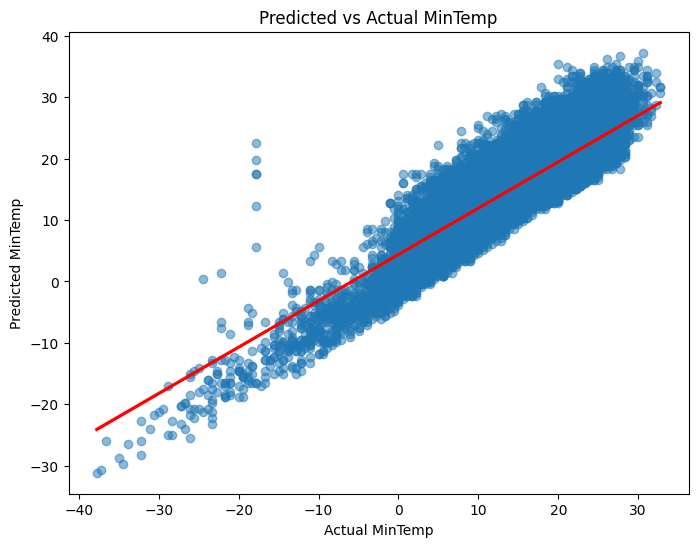

In [106]:
# Make predictions on the test set
y_pred = model.predict(X_test)


plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Actual MinTemp")
plt.ylabel("Predicted MinTemp")
plt.title("Predicted vs Actual MinTemp")
plt.show()


## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# R squared value
r2 = r2_score(y_test, y_pred)

# RMSE (root-mean-squared error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# R-squared value indicates how well our model explains the variance of our target variable (in this case 'MinTemp').
# Because we got an R-squared value of 0.76, we can say that 76% of the variation in minimum temperature is explained by our model. 
# Generally, an R-squared value above 0.7 is considered good in many fields, so we can say our model is performing well.

# RMSE is the metric that tells us how far off our predictions are from the actual predicted values.
# We got an RMSE of 3.95, which means that on average, our predictions are off by about 3.95 degrees from the actual MinTemp values.
# The lower the RMSE, the better the model's performance. An RMSE of 3.95 is relatively low, indicating that our model's predictions are quite accurate.


R-squared: 0.7603894297032858
RMSE: 3.9453470676662414


## 8. Discuss the model performance based on the plot

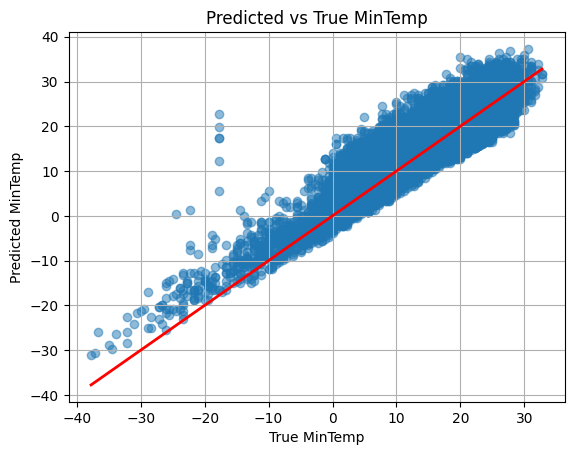

In [ ]:
# From our plot in step 6, we can see that the predicted values are closely aligned with the actual values where as the true MinTemp goes up, the predicted MinTemp also goes up linearly.
# We can see that other than a few outliers at the -18 true MinTemp mark, the predicted MinTemp values are very close to the actual MinTemp values (indicated by the red line).
# We also know from the R-Squared and RMSE values that our model is performing well,w with 76% of the variability in MinTemp being explained by our model as well as our model being off (on average) by 3.95 degrees from the actual MinTemp values.
# Overall, our model is performing well and can be used to predict MinTemp based on MaxTemp and MAX.